# Problem Statement

AtliQ Motors is an automotive giant from the USA specializing in electric vehicles (EV). 
In the last 5 years, their market share rose to 25% in electric and hybrid vehicles segment in North America. 
As a part of their expansion plans, they wanted to launch their bestselling models in India where their market share is less than 2%. 
Bruce Haryali, the chief of AtliQ Motors India wanted to do a detailed market study of existing EV/Hybrid market in India before proceeding further. 
Bruce gave this task to the data analytics team of AtliQ motors and Peter Pandey is the data analyst working in this team.

# Why are we doing this analysis for AtliQ Motors?

# 1. Market Understanding:
AtliQ Motors has <2% market share in India. This analysis helps them understand:
How big is the Indian EV/Hybrid market?
What is the growth trend of EV adoption in India?
Who are the top players in the market currently?

# 2. Consumer Behavior & Preferences:
To make the right product and marketing decisions, AtliQ needs to know:
What types of EVs (e.g., 2-wheelers, 4-wheelers, hybrids) are popular?
What features do Indian consumers prefer?
What are the price points customers are comfortable with?

# 3. Competitor Analysis:
This will help identify:
Which brands are leading?
What are their strengths (pricing, range, features)?
Where is the gap that AtliQ can fill?

# 4. Regional Opportunities:
India is diverse. This study will show:
Which states/cities have higher EV adoption?
Where is infrastructure (like charging stations) more developed?

# 5. Strategic Decision Making:
The insights from this analysis will help the leadership decide:
Which models to launch
Where to launch first
What pricing and marketing strategy to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import and Data Exploration

In [2]:
dim_date=pd.read_csv("C:/Users/Hairav/Downloads/RPC12_Input_For_Participants/RPC12_Input_For_Participants/datasets/dim_date.csv")

In [3]:
dim_date.head(5)

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [4]:
dim_date.isnull().sum()

date           0
fiscal_year    0
quarter        0
dtype: int64

In [5]:
dim_date.shape

(36, 3)

In [6]:
dim_date.columns

Index(['date', 'fiscal_year', 'quarter'], dtype='object')

In [7]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 996.0+ bytes


In [8]:
state_sales=pd.read_csv("C:/Users/Hairav/Downloads/RPC12_Input_For_Participants/RPC12_Input_For_Participants/datasets/electric_vehicle_sales_by_state.csv")

In [9]:
state_sales.head(3)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113


In [10]:
state_sales.isnull().sum()

date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64

In [11]:
state_sales.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold'],
      dtype='object')

In [12]:
state_sales.shape

(2445, 5)

In [13]:
state_sales.describe()

,electric_vehicles_sold,total_vehicles_sold
count,2445.000000,2445.000000
mean,845.035174,23402.966053
std,2185.167744,38353.266389
min,0.000000,1.000000
25%,2.000000,1158.000000
50%,54.000000,6098.000000
75%,534.000000,29396.000000
max,26668.000000,387983.000000


In [14]:
# Checking Outlier
avg,std=state_sales["total_vehicles_sold"].mean(),state_sales["total_vehicles_sold"].std()

In [15]:
avg,std

(23402.966053169734, 38353.26638907312)

In [16]:
higher_limt= avg+3*std
lower_limit=avg-3*std
higher_limt,lower_limit

(138462.7652203891, -91656.83311404963)

In [17]:
# state_sales[state_sales["total_vehicles_sold"]<0]

In [18]:
# state_sales[state_sales["total_vehicles_sold"]>higher_limt]

In [19]:
total_state=len(state_sales["state"].unique())
total_state

35

In [20]:
max_ev_sales=state_sales["electric_vehicles_sold"].max()
max_ev_sales

26668

In [21]:
state_sales[state_sales["electric_vehicles_sold"]==max_ev_sales]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
2415,01-Mar-24,Maharashtra,2-Wheelers,26668,152563


In [22]:
# Maharashtra has recorded the maximum EV sales among all states.

In [23]:
max_total_sales = state_sales["total_vehicles_sold"].max()
max_total_sales

387983

In [24]:
state_sales[state_sales["total_vehicles_sold"]==max_total_sales]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
2321,01-Nov-23,Uttar Pradesh,2-Wheelers,5327,387983


In [25]:
makers_sales=pd.read_csv("C:/Users/Hairav/Downloads/RPC12_Input_For_Participants/RPC12_Input_For_Participants/datasets/electric_vehicle_sales_by_makers.csv")

In [26]:
makers_sales.head(3)

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0


In [27]:
makers_sales.shape

(816, 4)

In [28]:
makers_sales.isnull().sum()

date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
dtype: int64

In [29]:
makers_sales[makers_sales.duplicated()]

,date,vehicle_category,maker,electric_vehicles_sold


In [30]:
makers_sales.duplicated().sum()

0

In [31]:
makers_sales.columns

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')

In [32]:
makers_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [33]:
makers_sales.describe()

,electric_vehicles_sold
count,816.000000
mean,2531.998775
std,4771.077333
min,0.000000
25%,42.000000
50%,662.000000
75%,2636.500000
max,44630.000000


In [34]:
no_of_maker = len(makers_sales["maker"].unique())
no_of_maker

26

Currently, there are 26 electric vehicle (EV) manufacturing companies actively operating in the Indian market. 
This indicates a highly competitive environment with multiple players already established.

In [35]:
makers_sales["vehicle_category"].unique()

array(['2-Wheelers', '4-Wheelers'], dtype=object)

It is recommended that AtliQ Motors should focus on manufacturing 3-wheelers and 6-wheelers, particularly mini trucks designed 
for export-import and commercial logistics purposes.

In [36]:
# Data Set We have
# dim_date
# state_sales
# makers_sales

# Research Questions

# 1. List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [37]:
# ss-- state_sales
# ms-- makers_sales
df_ss =pd.merge(dim_date,state_sales,on='date')
df_ms =pd.merge(dim_date,makers_sales,on='date')

# For the 2023 fiscal year

In [38]:
sale_2023 =df_ms[(df_ms["fiscal_year"]==2023) & (df_ms["vehicle_category"]=="2-Wheelers")]
two_wheelers_2023=sale_2023.groupby(["maker"]).agg({"electric_vehicles_sold":"sum"}).reset_index()
two_wheelers_2023["top_rank"]=two_wheelers_2023["electric_vehicles_sold"].rank(method="dense",ascending=False)
two_wheelers_2023["bottom_rank"] = two_wheelers_2023["electric_vehicles_sold"].rank(method="dense",ascending=True)                                                         

In [39]:
top_5 =two_wheelers_2023[two_wheelers_2023["top_rank"]<=5].sort_values(by="electric_vehicles_sold",ascending=False)
bottom_5 =two_wheelers_2023[two_wheelers_2023["bottom_rank"]<=5].sort_values(by="electric_vehicles_sold")

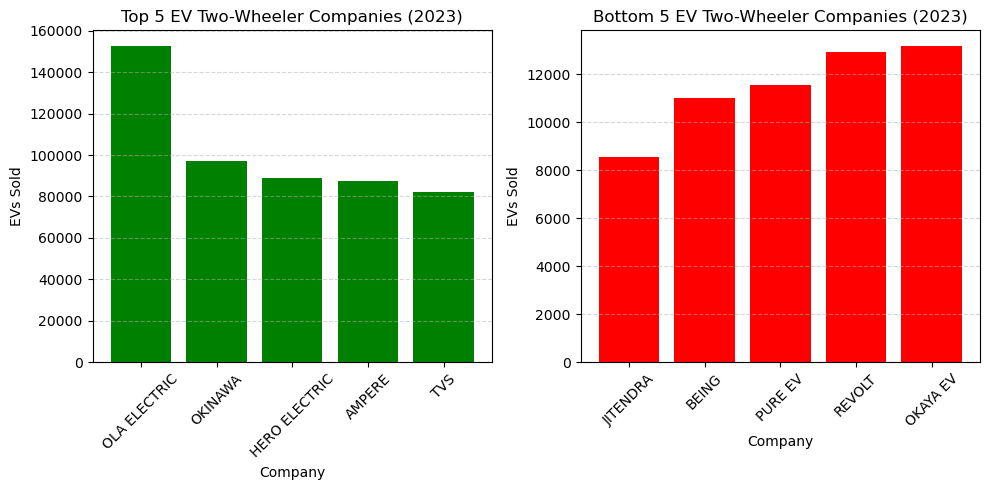

In [40]:
plt.figure(figsize=(10, 5))

# Plot Top 5 Companies
plt.subplot(1, 2, 1)
plt.bar(top_5["maker"], top_5["electric_vehicles_sold"], color='green')
plt.title("Top 5 EV Two-Wheeler Companies (2023)")
plt.xlabel("Company")
plt.ylabel("EVs Sold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Plot Bottom 5 Companies
plt.subplot(1, 2, 2)
plt.bar(bottom_5["maker"], bottom_5["electric_vehicles_sold"], color='red')
plt.title("Bottom 5 EV Two-Wheeler Companies (2023)")
plt.xlabel("Company")
plt.ylabel("EVs Sold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# For the 2024 fiscal year

In [41]:
sale_2024 =df_ms[(df_ms["fiscal_year"]==2024) & (df_ms["vehicle_category"]=="2-Wheelers")]
two_wheelers_2024=sale_2024.groupby(["maker"]).agg({"electric_vehicles_sold":"sum"}).reset_index()
two_wheelers_2024["top_rank"]=two_wheelers_2024["electric_vehicles_sold"].rank(method="dense",ascending=False)
two_wheelers_2024["bottom_rank"] = two_wheelers_2024["electric_vehicles_sold"].rank(method="dense",ascending=True) 

In [42]:
top_5 =two_wheelers_2024[two_wheelers_2024["top_rank"]<=5].sort_values(by="electric_vehicles_sold",ascending=False)
bottom_5 =two_wheelers_2024[two_wheelers_2024["bottom_rank"]<=5].sort_values(by="electric_vehicles_sold")

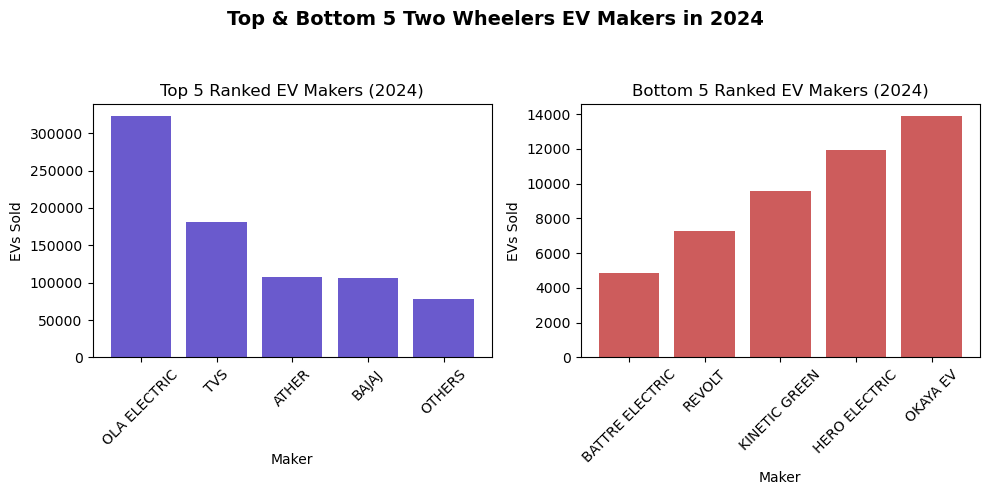

In [43]:
plt.figure(figsize=(10, 5))

# Top 5 subplot
plt.subplot(1, 2, 1)
plt.bar(top_5["maker"], top_5["electric_vehicles_sold"], color='slateblue')
plt.title("Top 5 Ranked EV Makers (2024)")
plt.xlabel("Maker")
plt.ylabel("EVs Sold")
plt.xticks(rotation=45)

# Bottom 5 subplot
plt.subplot(1, 2, 2)
plt.bar(bottom_5["maker"], bottom_5["electric_vehicles_sold"], color='indianred')
plt.title("Bottom 5 Ranked EV Makers (2024)")
plt.xlabel("Maker")
plt.ylabel("EVs Sold")
plt.xticks(rotation=45)

# Main title
plt.suptitle("Top & Bottom 5 Two Wheelers EV Makers in 2024", fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# 2. Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024.

In [44]:
fy_2024=df_ss[df_ss["fiscal_year"]==2024]

In [45]:
two_wheelers_penetration=fy_2024[fy_2024["vehicle_category"]=="2-Wheelers"].groupby("state").agg({"electric_vehicles_sold":"sum","total_vehicles_sold":"sum"}).reset_index()

In [46]:
two_wheelers_penetration["pr_rate"]=two_wheelers_penetration["electric_vehicles_sold"]*100/two_wheelers_penetration["total_vehicles_sold"]
two_wheelers_penetration["rank"]=two_wheelers_penetration["pr_rate"].rank(method="dense",ascending =False)
top_5_tw=two_wheelers_penetration[two_wheelers_penetration["rank"]<=5][["state","pr_rate"]].sort_values(by="pr_rate",ascending=False)
top_5_tw

,state,pr_rate
10,Goa,17.992264
17,Kerala,13.524903
16,Karnataka,11.573279
20,Maharashtra,10.072507
9,Delhi,9.400866


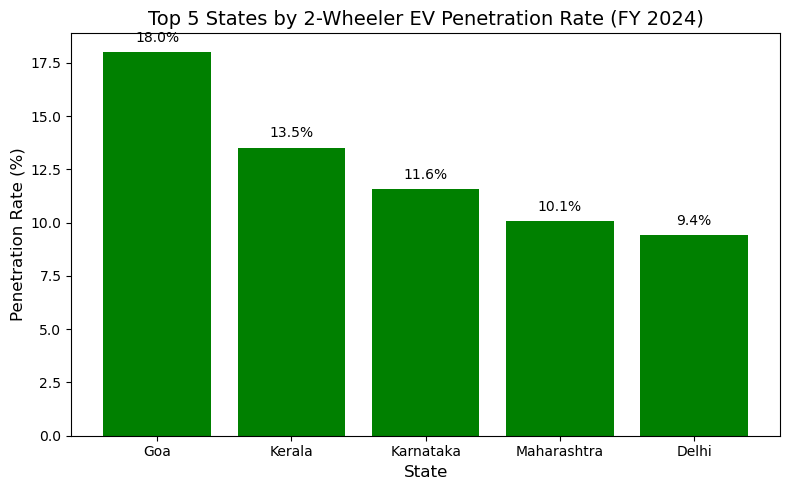

In [47]:
plt.figure(figsize=(8,5))
plt.bar(top_5_tw["state"], top_5_tw["pr_rate"], color='green')

# Add titles and labels
plt.title("Top 5 States by 2-Wheeler EV Penetration Rate (FY 2024)", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Penetration Rate (%)", fontsize=12)

# Display values on top of bars
for index, value in enumerate(top_5_tw["pr_rate"]):
    plt.text(index, value + 0.5, f"{value:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [48]:
four_wheelers_penetration=fy_2024[fy_2024["vehicle_category"]=="4-Wheelers"].groupby("state").agg({"electric_vehicles_sold":"sum","total_vehicles_sold":"sum"}).reset_index()

In [49]:
four_wheelers_penetration["pr_rate"]=four_wheelers_penetration["electric_vehicles_sold"]*100/four_wheelers_penetration["total_vehicles_sold"]
top_5_fw=four_wheelers_penetration.nlargest(5,"pr_rate")[["state","pr_rate"]]
top_5_fw

,state,pr_rate
17,Kerala,5.758445
6,Chandigarh,4.503112
9,Delhi,4.290757
16,Karnataka,4.261120
10,Goa,4.254353


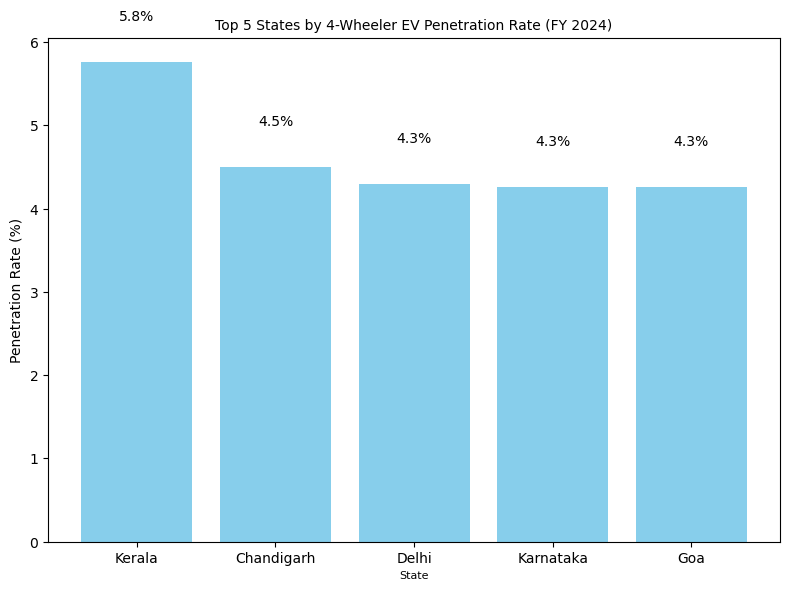

In [50]:
plt.figure(figsize=(8, 6))
plt.bar(top_5_fw["state"], top_5_fw["pr_rate"], color='skyblue')

# Add titles and labels
plt.title("Top 5 States by 4-Wheeler EV Penetration Rate (FY 2024)", fontsize=10)
plt.xlabel("State", fontsize=8)
plt.ylabel("Penetration Rate (%)", fontsize=10)

# Display values on top of bars
for index, value in enumerate(top_5_fw["pr_rate"]):
    plt.text(index, value + 0.5, f"{value:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 3. List the states with negative penetration (decline) in EV sales from 2022 to 2024? 

In [51]:
pr_2022= df_ss[df_ss["fiscal_year"]==2022].groupby("state").agg({"electric_vehicles_sold":"sum","total_vehicles_sold":"sum"}).reset_index()
pr_2022["pr_rate"]=pr_2022["electric_vehicles_sold"]*100/pr_2022["total_vehicles_sold"]

In [52]:
pr_2023= df_ss[df_ss["fiscal_year"]==2023].groupby("state").agg({"electric_vehicles_sold":"sum","total_vehicles_sold":"sum"}).reset_index()
pr_2023["pr_rate"]=pr_2023["electric_vehicles_sold"]*100/pr_2022["total_vehicles_sold"]

In [53]:
pr_2024= df_ss[df_ss["fiscal_year"]==2024].groupby("state").agg({"electric_vehicles_sold":"sum","total_vehicles_sold":"sum"}).reset_index()
pr_2024["pr_rate"]=pr_2024["electric_vehicles_sold"]*100/pr_2024["total_vehicles_sold"]

In [54]:
pr_of_2022=pr_2022[["state","pr_rate"]].rename(columns={"pr_rate": "pr_rate_2022"})
pr_of_2023=pr_2023[["state","pr_rate"]].rename(columns={"pr_rate": "pr_rate_2023"})
pr_of_2024=pr_2024[["state","pr_rate"]].rename(columns={"pr_rate": "pr_rate_2024"})

In [55]:
trend = pr_of_2022.merge(pr_of_2023, on="state", how="inner").merge(pr_of_2024, on="state", how="inner")

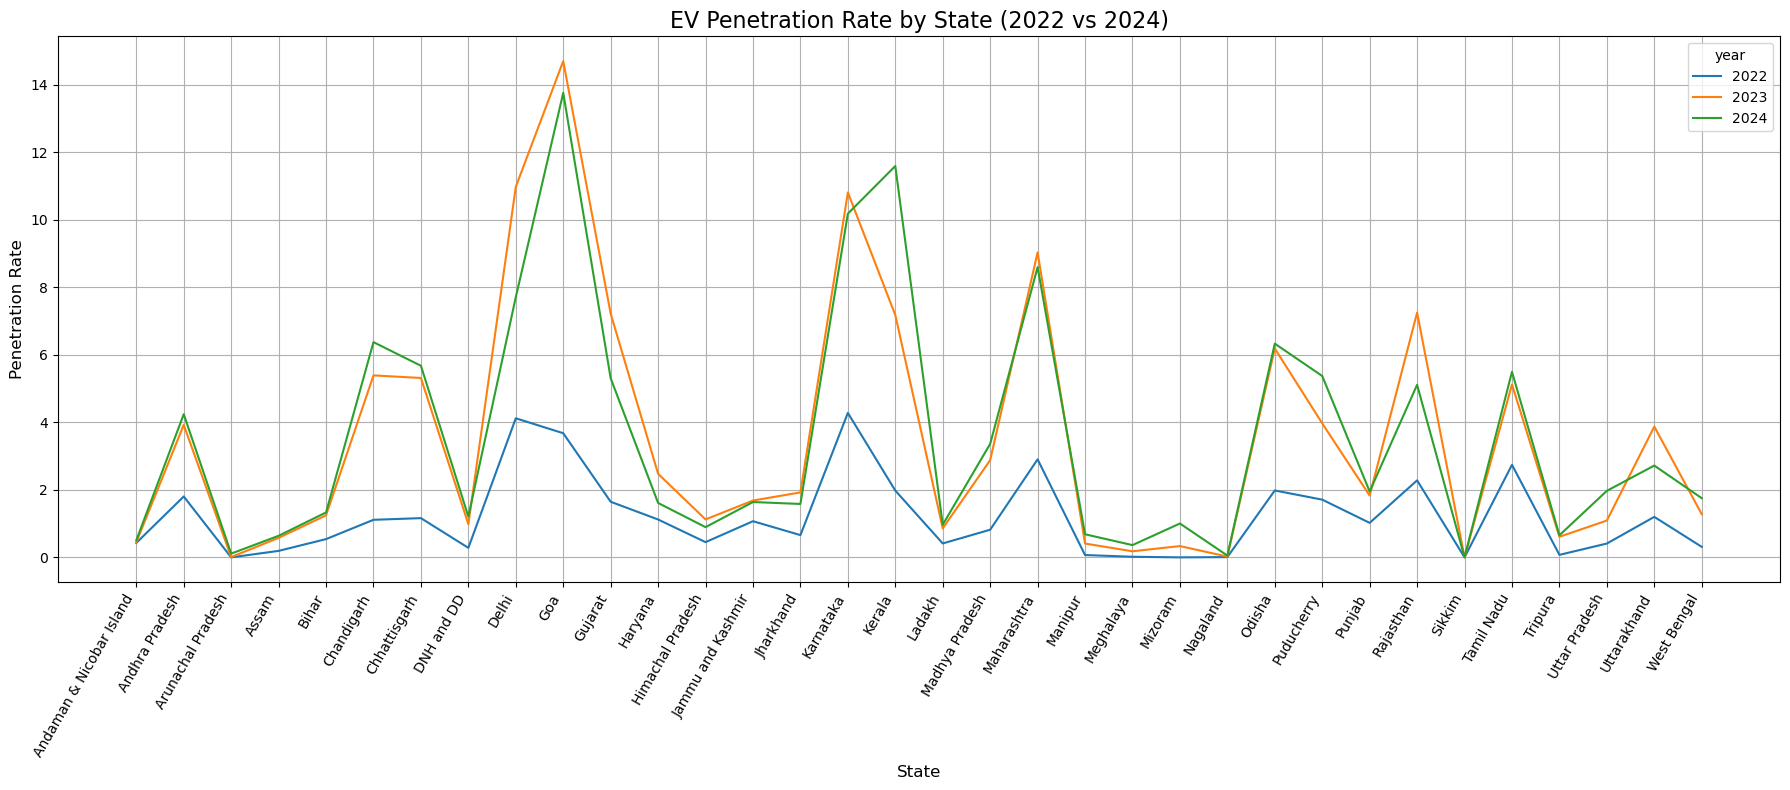

In [56]:
trend_melted = trend.melt(id_vars="state", 
                          value_vars=["pr_rate_2022", "pr_rate_2023", "pr_rate_2024"],
                          var_name="year", value_name="pr_rate")

# Clean year column for better labels
trend_melted["year"] = trend_melted["year"].str.extract(r'(\d{4})')  # Extract year as number

# Plot
plt.figure(figsize=(18, 8))
for year in trend_melted["year"].unique():
    yearly_data = trend_melted[trend_melted["year"] == year]
    plt.plot(yearly_data["state"], yearly_data["pr_rate"], label=year)

plt.title("EV Penetration Rate by State (2022 vs 2024)", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Penetration Rate", fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.legend(title="year")
plt.tight_layout()
plt.grid(True)
plt.show()

In [57]:
# 4. What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?

In [84]:
maker_ev=df_ms[df_ms["vehicle_category"]=="4-Wheelers"].groupby("maker").agg({"electric_vehicles_sold":"sum"}).reset_index()
maker_ev["rank"]=maker_ev["electric_vehicles_sold"].rank(method="dense",ascending=False)
top5_makers=maker_ev[maker_ev["rank"]<=5][["maker"]]
top5_makers

,maker
1,BYD India
2,Hyundai Motor
4,MG Motor
5,Mahindra & Mahindra
8,Tata Motors


In [82]:
top5_trend=pd.merge(top5_makers,df_ms,on="maker")
top5_trend["year_quarter"]=top5_trend["fiscal_year"].astype(str)+'-'+top5_trend["quarter"]
top5_sales_trend=top5_trend.groupby(["maker","year_quarter"]).agg({"electric_vehicles_sold":"sum"}).reset_index()
top5_sales_trend

,maker,year_quarter,electric_vehicles_sold
0,BYD India,2022-Q1,0
1,BYD India,2022-Q2,0
2,BYD India,2022-Q3,1
3,BYD India,2022-Q4,32
4,BYD India,2023-Q1,81
5,BYD India,2023-Q2,113
6,BYD India,2023-Q3,103
7,BYD India,2023-Q4,623
8,BYD India,2024-Q1,406
9,BYD India,2024-Q2,310


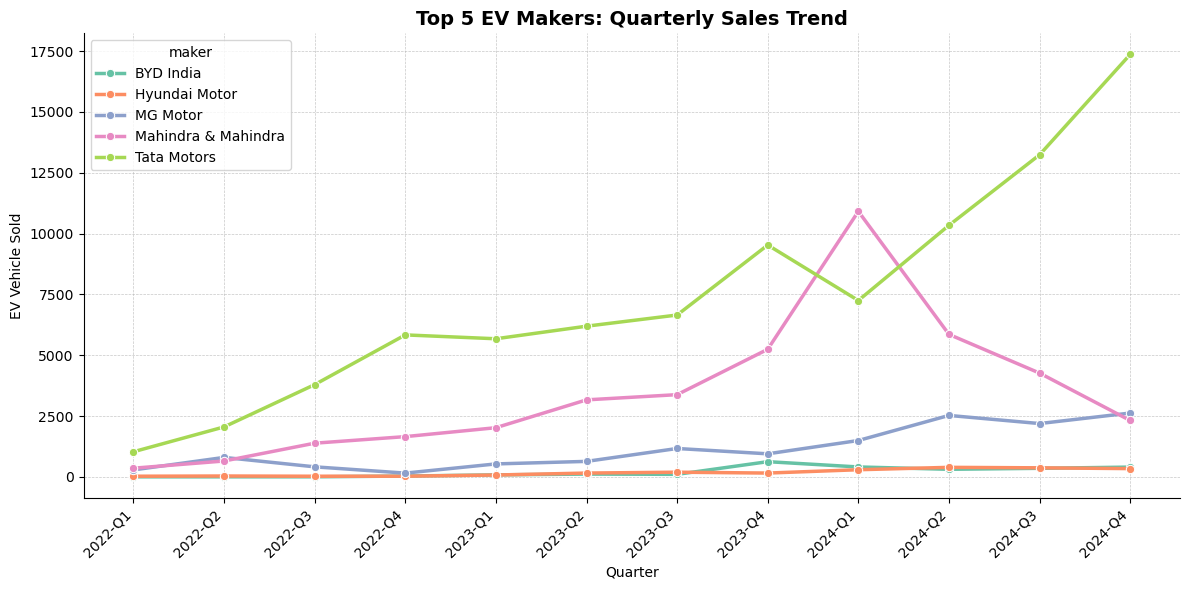

In [83]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top5_sales_trend, x='year_quarter', y='electric_vehicles_sold', hue='maker', marker='o',linewidth=2.5, palette='Set2')

plt.title('Top 5 EV Makers: Quarterly Sales Trend', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Quarter')
plt.ylabel('EV Vehicle Sold')
plt.tight_layout()
sns.despine()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# This visualization shows the quarterly electric vehicle (EV) sales trend of the top 5 EV makers from Q1 2022 to Q4 2024.

Tata Motors leads the market with consistent growth, peaking in Q4 2024.
Mahindra & Mahindra showed a sharp surge in Q1 2024, followed by a gradual decline.
MG Motor and Hyundai Motor maintained steady performance with minor fluctuations.
BYD India began making notable entries from Q3 2023 onward.

# 5. How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?

In [110]:
delhi_karnataka=df_ss[((df_ss["fiscal_year"]==2024) & ((df_ss["state"]=="Delhi") | (df_ss["state"]=="Karnataka")))]
delhi_karnataka_sales=delhi_karnataka.groupby("state").agg({"electric_vehicles_sold":"sum","total_vehicles_sold":"sum"}).reset_index()
delhi_karnataka_sales["penetration"]= delhi_karnataka_sales["electric_vehicles_sold"]*100/delhi_karnataka_sales["total_vehicles_sold"]
delhi_karnataka_sales[["state","electric_vehicles_sold"]]

,state,electric_vehicles_sold
0,Delhi,46724
1,Karnataka,160989


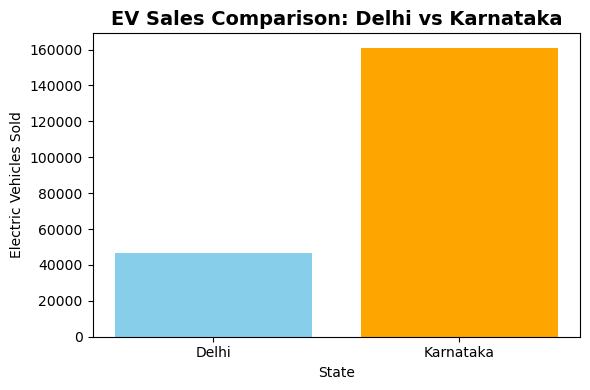

In [111]:
plt.figure(figsize=(6,4))
plt.bar(delhi_karnataka_sales["state"], delhi_karnataka_sales["electric_vehicles_sold"], color=['skyblue', 'orange'])
plt.title("EV Sales Comparison: Delhi vs Karnataka", fontsize=14, fontweight='bold')
plt.xlabel("State")
plt.ylabel("Electric Vehicles Sold")
plt.tight_layout()
plt.show()

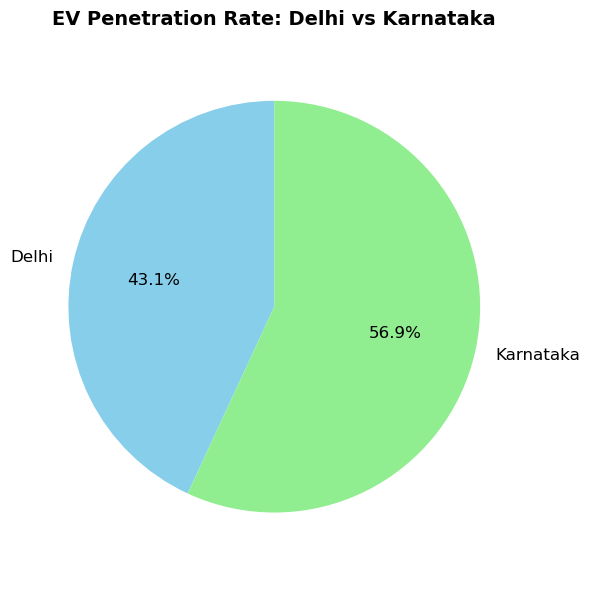

In [115]:
# Penetration Rate
delhi_karnataka_sales[["state","penetration"]]
labels = delhi_karnataka_sales["state"]
sizes = delhi_karnataka_sales["penetration"]
colors = ['skyblue', 'lightgreen']

# Pie plot
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title("EV Penetration Rate: Delhi vs Karnataka", fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

The EV penetration comparison between Delhi and Karnataka reveals that Karnataka leads with a 56.9% penetration rate, while Delhi accounts for 43.1%. This suggests that Karnataka has a slightly stronger adoption of electric vehicles, potentially due to better policy support, infrastructure, or incentives in the state. The gap, though not large, highlights varying regional momentum in EV adoption across India.

# 6. List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

In [133]:
four_wheelers=df_ms[df_ms["vehicle_category"]=="4-Wheelers"]
cagr_df=four_wheelers.groupby(["maker","fiscal_year"]).agg({"electric_vehicles_sold":"sum"}).reset_index()
cagr_df_pivot=cagr_df.pivot(index='maker',columns='fiscal_year',values='electric_vehicles_sold').reset_index()
cagr_df_pivot = cagr_df_pivot[~((cagr_df_pivot[2022].isnull()) | (cagr_df_pivot[2022] == 0))]
cagr_df_pivot[2024]=cagr_df_pivot[2024].fillna(0)
cagr_df_pivot['cagr']=(((cagr_df_pivot[2024]/cagr_df_pivot[2022])**0.5)-1)*100
cagr_df_pivot["rank"]=cagr_df_pivot["cagr"].rank(method="dense",ascending=False)
top5_cagr_maker=cagr_df_pivot[cagr_df_pivot['rank']<=5]
top5_cagr_maker

fiscal_year,maker,2022,2023,2024,cagr,rank
0,BMW India,7,285,1078,1140.967365,1.0
1,BYD India,33,920,1466,566.515134,3.0
2,Hyundai Motor,110,576,1390,255.476633,4.0
6,Mercedes -Benz AG,26,71,291,234.549065,5.0
9,Volvo Auto India,4,105,459,971.214264,2.0


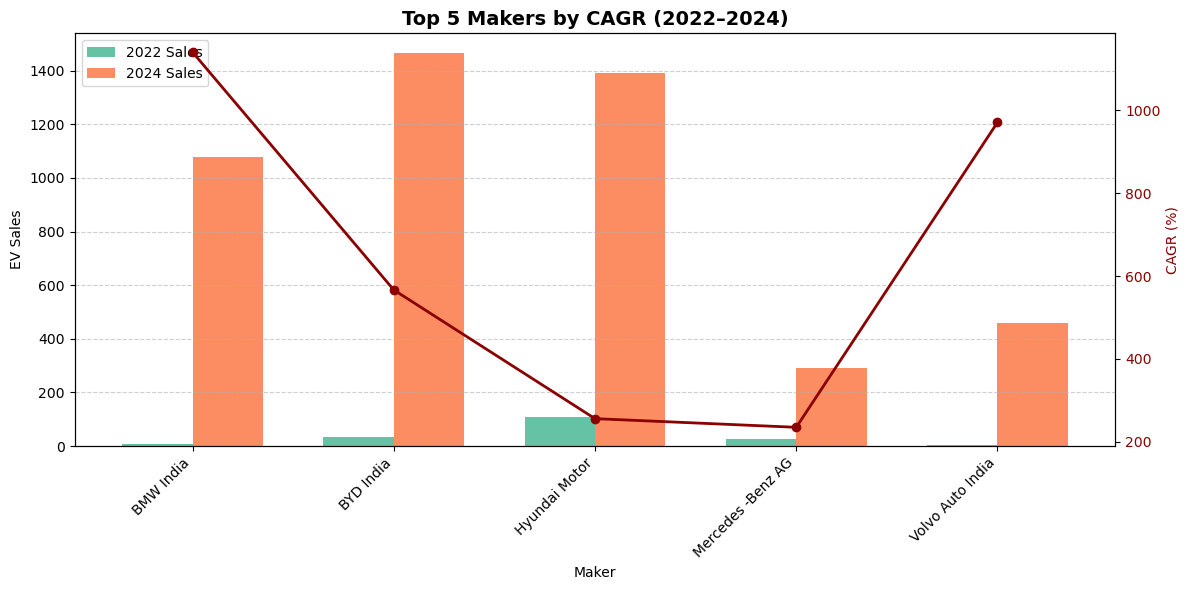

In [134]:
# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))
x = np.arange(len(top5_cagr_maker['maker']))
width = 0.35
# Bar plot for 2022 and 2024 sales
bars1 = ax1.bar(x - width/2, top5_cagr_maker[2022], width, label='2022 Sales', color='#66c2a5')
bars2 = ax1.bar(x + width/2, top5_cagr_maker[2024], width, label='2024 Sales', color='#fc8d62')
# Axis 1 settings
ax1.set_xlabel('Maker')
ax1.set_ylabel('EV Sales')
ax1.set_xticks(x)
ax1.set_xticklabels(top5_cagr_maker['maker'], rotation=45, ha='right')
ax1.legend(loc='upper left')
ax1.set_title('Top 5 Makers by CAGR (2022–2024)', fontsize=14, fontweight='bold')
# Secondary Y-axis for CAGR
ax2 = ax1.twinx()
ax2.plot(x, top5_cagr_maker['cagr'], color='darkred', marker='o', label='CAGR (%)', linewidth=2)
ax2.set_ylabel('CAGR (%)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
# Only show horizontal gridlines on primary y-axis
ax1.grid(axis='y', linestyle='--', alpha=0.6)
ax2.grid(False)  # disable grid on secondary axis
# Final layout
fig.tight_layout()
plt.show()

# 7. List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

In [151]:
cagr_df=df_ss.groupby(["state","fiscal_year"]).agg({"total_vehicles_sold":"sum"}).reset_index()
cagr_df_pivot=cagr_df.pivot(index="state",columns="fiscal_year",values="total_vehicles_sold").reset_index()
cagr_df_pivot = cagr_df_pivot[~((cagr_df_pivot[2022].isnull()) | (cagr_df_pivot[2022] == 0))]
cagr_df_pivot[2024]=cagr_df_pivot[2024].fillna(0)
cagr_df_pivot['cagr']=(((cagr_df_pivot[2024]/cagr_df_pivot[2022])**0.5)-1)*100
cagr_df_pivot["rank"]=cagr_df_pivot["cagr"].rank(method="dense",ascending=False)
top10_cagr_state=cagr_df_pivot[cagr_df_pivot["rank"]<=10]

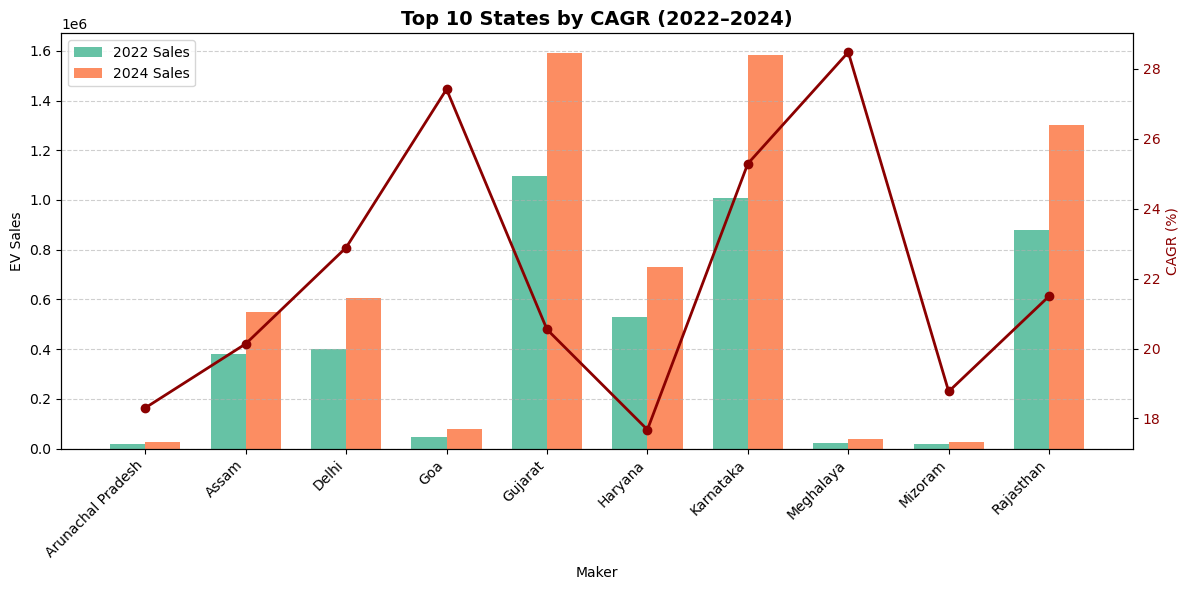

In [152]:
# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(top10_cagr_state['state']))
width = 0.35

# Bar plot for 2022 and 2024 sales
bars1 = ax1.bar(x - width/2, top10_cagr_state[2022], width, label='2022 Sales', color='#66c2a5')
bars2 = ax1.bar(x + width/2, top10_cagr_state[2024], width, label='2024 Sales', color='#fc8d62')

# Axis 1 settings
ax1.set_xlabel('Maker')
ax1.set_ylabel('EV Sales')
ax1.set_xticks(x)
ax1.set_xticklabels(top10_cagr_state['state'], rotation=45, ha='right')
ax1.legend(loc='upper left')
ax1.set_title('Top 10 States by CAGR (2022–2024)', fontsize=14, fontweight='bold')

# Secondary Y-axis for CAGR
ax2 = ax1.twinx()
ax2.plot(x, top10_cagr_state['cagr'], color='darkred', marker='o', label='CAGR (%)', linewidth=2)
ax2.set_ylabel('CAGR (%)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Only show horizontal gridlines on primary y-axis
ax1.grid(axis='y', linestyle='--', alpha=0.6)
ax2.grid(False)  # disable grid on secondary axis

# Final layout
fig.tight_layout()
plt.show()

# 8. What are the peak and low season months for EV sales based on the data from 2022 to 2024?

In [161]:
df_ss["year_quarter"]=df_ss["fiscal_year"].astype("str")+"-"+df_ss["quarter"]
ev_sales=df_ss.groupby("year_quarter")["electric_vehicles_sold"].sum().reset_index()

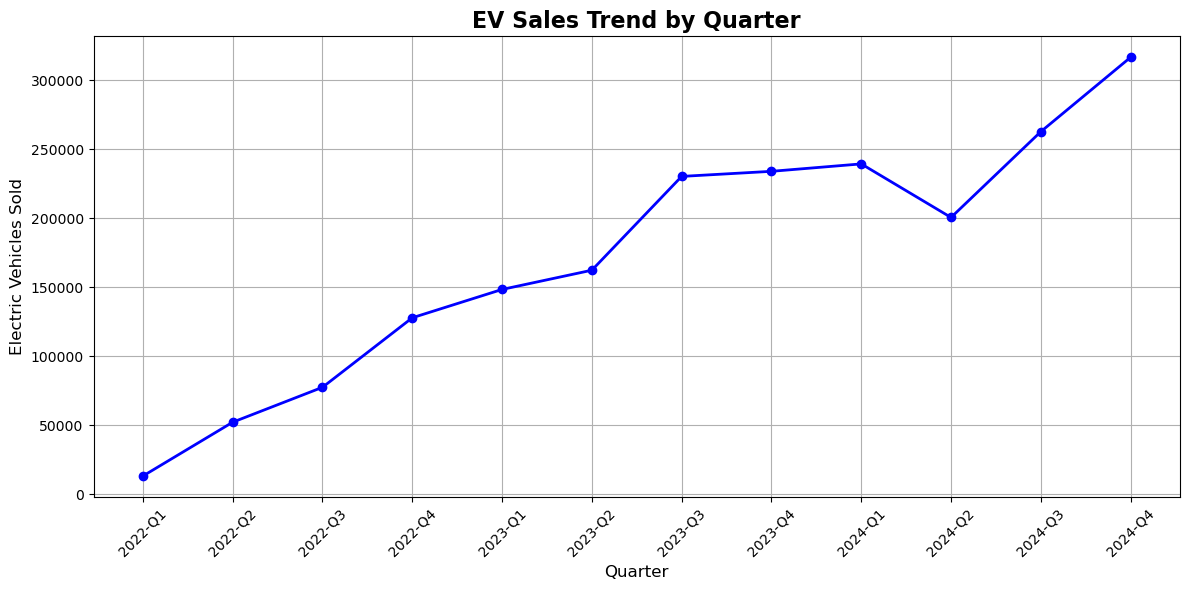

In [162]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(ev_sales["year_quarter"], ev_sales["electric_vehicles_sold"], marker='o', linestyle='-', color='blue', linewidth=2)

# Add titles and labels
plt.title("EV Sales Trend by Quarter", fontsize=16, fontweight='bold')
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Electric Vehicles Sold", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# EV Sales Trend Summary (2022–2024):
EV sales showed steady growth from 2022, with a sharp rise in late 2023. Despite a dip in Q2 2024, sales bounced back and reached an all-time high in Q4 2024. The overall trend reflects strong and growing adoption of electric vehicles.

# 9. What is the projected number of EV sales (including 2-wheelers and 4-wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years? 

In [174]:
state_ev=df_ss.groupby("state").agg({"electric_vehicles_sold":"sum","total_vehicles_sold":"sum"}).reset_index()
state_ev["penetration"]=state_ev["electric_vehicles_sold"]*100/state_ev["total_vehicles_sold"]
state_ev["rank"] =state_ev["penetration"].rank(method="dense",ascending=False)
top10_state=state_ev[state_ev["rank"]<=10][["state"]]

In [189]:
year_sales=df_ss.groupby(["state","fiscal_year"]).agg({"electric_vehicles_sold":"sum"}).reset_index()
year_sales_pivot=year_sales.pivot(index="state",columns="fiscal_year",values="electric_vehicles_sold").reset_index()
top10_state_penetration=pd.merge(top10_state,year_sales_pivot,on='state')
top10_state_penetration['cagr']=(((top10_state_penetration[2024]/top10_state_penetration[2022])**0.5)-1)*100
top10_state_penetration['growth']=(1+(top10_state_penetration['cagr']/100))**8
top10_state_penetration['2030']=top10_state_penetration['growth']*top10_state_penetration[2022]
projected_2030_sales=top10_state_penetration[['state','2030']]

C:\Users\Hairav\AppData\Local\Temp\ipykernel_19488\1382241031.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='2030', data=projected_2030_sales, palette='Set2')


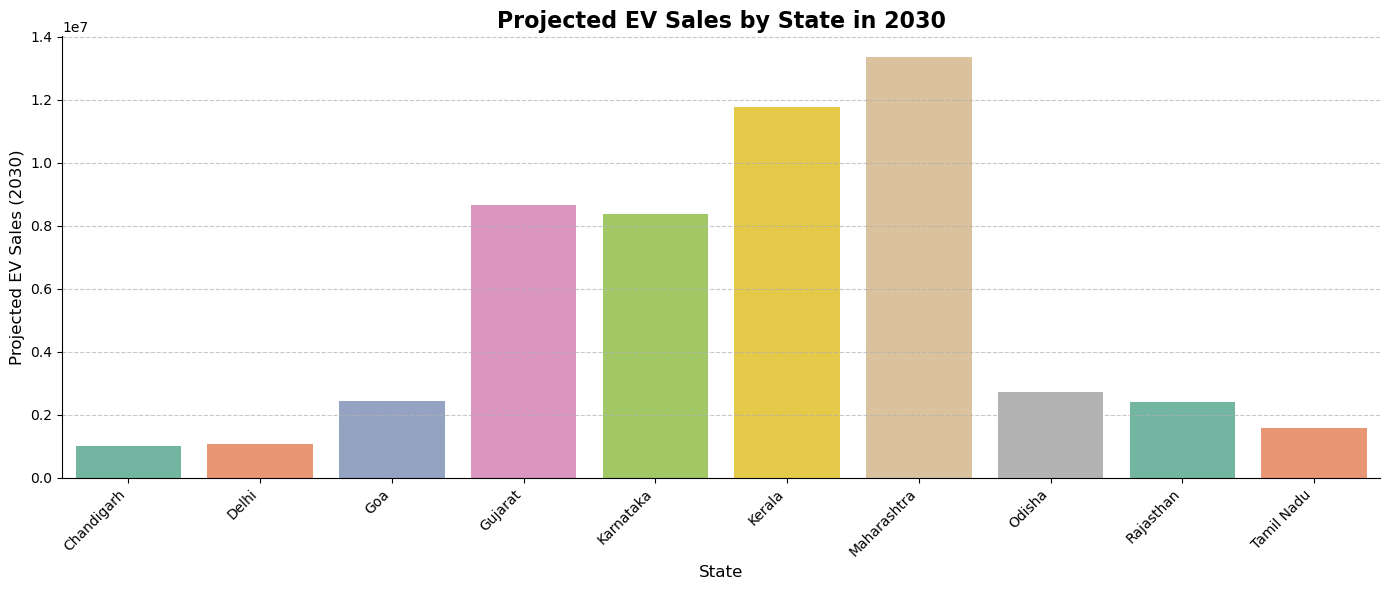

In [191]:
plt.figure(figsize=(14, 6))
sns.barplot(x='state', y='2030', data=projected_2030_sales, palette='Set2')
# Title and labels
plt.title('Projected EV Sales by State in 2030', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Projected EV Sales (2030)', fontsize=12)
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
# Optional: remove top and right spines for a cleaner look
sns.despine()
# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Tight layout
plt.tight_layout()
plt.show()

Maharashtra leads with the highest projected EV sales, followed by Kerala, Gujarat, and Karnataka.
These states show strong future market potential, making them top contenders for setting up a manufacturing unit.

# 10. Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price. 

In [ ]:
# 2-wheeler --- 85,000
# 4-wheeler --- 15,00,000

In [200]:
ev_sales=df_ss.groupby(["vehicle_category","fiscal_year"])["electric_vehicles_sold"].sum().reset_index()
ev_sales_pivot=ev_sales.pivot(index="vehicle_category",columns="fiscal_year",values="electric_vehicles_sold").reset_index()
ev_sales_pivot

fiscal_year,vehicle_category,2022,2023,2024
0,2-Wheelers,252573,727903,932692
1,4-Wheelers,18577,47465,86901


In [212]:
# 2 Wheelers Growth
ev_sales_pivot_two_wheeler=ev_sales_pivot[ev_sales_pivot["vehicle_category"]=="2-Wheelers"]
ev_sales_pivot_two_wheeler["2022_sales"]=ev_sales_pivot_two_wheeler[2022]*85000
ev_sales_pivot_two_wheeler["2023_sales"]=ev_sales_pivot_two_wheeler[2023]*85000
ev_sales_pivot_two_wheeler["2024_sales"]=ev_sales_pivot_two_wheeler[2024]*85000
ev_sales_pivot_two_wheeler["2022 vs 2024 growth"]=(ev_sales_pivot_two_wheeler["2024_sales"]-ev_sales_pivot_two_wheeler["2022_sales"])*100/ev_sales_pivot_two_wheeler["2022_sales"]
ev_sales_pivot_two_wheeler["2023 vs 2024 growth"]=(ev_sales_pivot_two_wheeler["2024_sales"]-ev_sales_pivot_two_wheeler["2023_sales"])*100/ev_sales_pivot_two_wheeler["2023_sales"]
ev_sales_pivot_two_wheeler

fiscal_year,vehicle_category,2022,2023,2024,2022_sales,2023_sales,2024_sales,2022 vs 2024 growth,2023 vs 2024 growth
0,2-Wheelers,252573,727903,932692,21468705000,61871755000,79278820000,269.276209,28.134106


2-Wheelers EV Revenue Growth in India
2022 to 2024:  269.28% growth
2023 to 2024:  28.13% growth
There's a massive jump from 2022 to 2024, indicating strong early adoption.
Growth is still positive from 2023 to 2024, but at a more moderate rate, suggesting market stabilization.

In [216]:
# 4 Wheelers Growth
ev_sales_pivot_4_wheeler=ev_sales_pivot[ev_sales_pivot["vehicle_category"]=="4-Wheelers"]
ev_sales_pivot_4_wheeler["2022_sales"]=ev_sales_pivot_4_wheeler[2022]*1500000
ev_sales_pivot_4_wheeler["2023_sales"]=ev_sales_pivot_4_wheeler[2023]*1500000
ev_sales_pivot_4_wheeler["2024_sales"]=ev_sales_pivot_4_wheeler[2024]*1500000
ev_sales_pivot_4_wheeler["2022 vs 2024 growth"]=(ev_sales_pivot_4_wheeler["2024_sales"]-ev_sales_pivot_4_wheeler["2022_sales"])*100/ev_sales_pivot_4_wheeler["2022_sales"]
ev_sales_pivot_4_wheeler["2023 vs 2024 growth"]=(ev_sales_pivot_4_wheeler["2024_sales"]-ev_sales_pivot_4_wheeler["2023_sales"])*100/ev_sales_pivot_4_wheeler["2023_sales"]
ev_sales_pivot_4_wheeler

fiscal_year,vehicle_category,2022,2023,2024,2022_sales,2023_sales,2024_sales,2022 vs 2024 growth,2023 vs 2024 growth
1,4-Wheelers,18577,47465,86901,27865500000,71197500000,130351500000,367.788125,83.084378


4-Wheelers EV Revenue Growth in India
2022 to 2024:  367.79% growth
2023 to 2024:  83.08% growth

Strong and accelerating growth, especially from 2023 to 2024.
Indicates increasing consumer adoption and higher-value vehicle purchases in this segment.